In [134]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error

In [135]:
sales = pd.read_csv(r"F:\GUVI\Project\Dominos - Predictive Purchase Order System\Cleaned_DATA\Pizza_sales.csv", index_col=0)

In [136]:
sales.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [137]:
sales['order_date'] = pd.to_datetime(sales['order_date'], format='mixed')

In [138]:
sales_data = sales.groupby('order_date')["quantity"].sum().reset_index()

In [139]:
sales_data

,order_date,quantity
0,2015-01-01,162
1,2015-01-02,191
2,2015-01-03,99
3,2015-01-04,135
4,2015-01-05,154
...,...,...
353,2015-12-27,89
354,2015-12-28,102
355,2015-12-29,80
356,2015-12-30,82


In [140]:
# split data
split = "2015-10-31"

In [141]:
train = sales_data[sales_data["order_date"]<=split]
test = sales_data[sales_data['order_date']>split]

In [142]:
train.shape

(299, 2)

In [143]:
test.shape

(59, 2)

In [193]:
# model

model = SARIMAX(train['quantity'], order=(1,0,1), seasonal_order=(1,1,1,2))
model_fit = model.fit()

In [194]:
forecasted_data = model_fit.forecast(steps = len(test))

In [195]:
forecasted_data.shape

(59,)

In [196]:
mape = mean_absolute_percentage_error(test['quantity'], forecasted_data)
print(f"Mean Absolute Percentage Error: {mape}")

Mean Absolute Percentage Error: 0.16420146886839931


In [197]:
forecast_next_7days = model_fit.forecast(steps=7)
forecast_df = pd.DataFrame({
            'order_date': pd.date_range(start=sales_data['order_date'].max() + pd.Timedelta(days=1), periods=7),  # Create new dates
            'forecasted_sales': forecast_next_7days
        })

In [198]:
forecast_df

,order_date,forecasted_sales
299,2016-01-01,132.309990
300,2016-01-02,140.621248
301,2016-01-03,135.585679
302,2016-01-04,143.085634
303,2016-01-05,135.254658
304,2016-01-06,142.838154
305,2016-01-07,135.287902


In [199]:
predicted_value=forecast_df[["forecasted_sales"]].values

In [200]:
predicted_value

array([[132.30999002],
       [140.62124847],
       [135.585679  ],
       [143.08563406],
       [135.25465811],
       [142.83815393],
       [135.28790186]])

In [201]:
actual_sales=sales_data.iloc[0:7]

In [202]:
actual_sales

,order_date,quantity
0,2015-01-01,162
1,2015-01-02,191
2,2015-01-03,99
3,2015-01-04,135
4,2015-01-05,154
5,2015-01-06,184
6,2015-01-07,137


In [203]:
actual_value=actual_sales[["quantity"]].values

In [204]:
actual_value

array([[162],
       [191],
       [ 99],
       [135],
       [154],
       [184],
       [137]], dtype=int64)

In [205]:
mape = mean_absolute_percentage_error(actual_value, predicted_value)
print(f"Mean Absolute Percentage Error: {mape}")

Mean Absolute Percentage Error: 0.17634377335681653


In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
actual_sales

,order_date,quantity
0,2015-01-01,162
1,2015-01-02,191
2,2015-01-03,99
3,2015-01-04,135
4,2015-01-05,154
5,2015-01-06,184
6,2015-01-07,137


In [208]:
forecast_df

,order_date,forecasted_sales
299,2016-01-01,132.309990
300,2016-01-02,140.621248
301,2016-01-03,135.585679
302,2016-01-04,143.085634
303,2016-01-05,135.254658
304,2016-01-06,142.838154
305,2016-01-07,135.287902


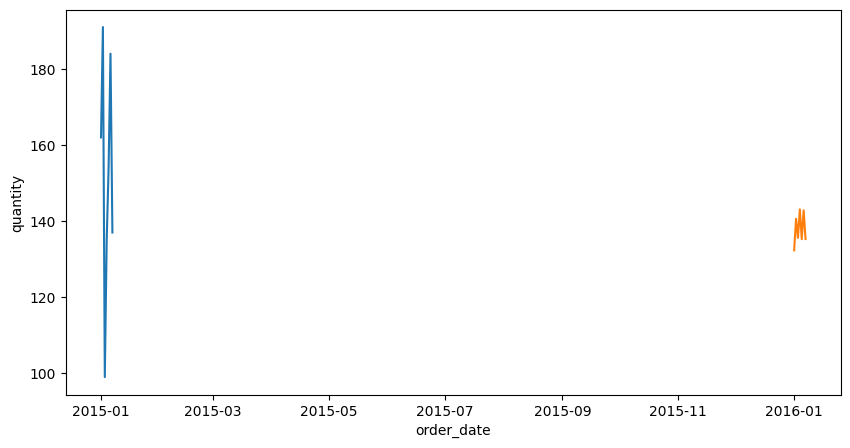

In [209]:
plt.figure(figsize=(10,5))
sns.lineplot(data=actual_sales,x="order_date",y="quantity")
sns.lineplot(data=forecast_df,x="order_date",y="forecasted_sales")
plt.show()

In [212]:
sales_data

,order_date,quantity
0,2015-01-01,162
1,2015-01-02,191
2,2015-01-03,99
3,2015-01-04,135
4,2015-01-05,154
...,...,...
353,2015-12-27,89
354,2015-12-28,102
355,2015-12-29,80
356,2015-12-30,82


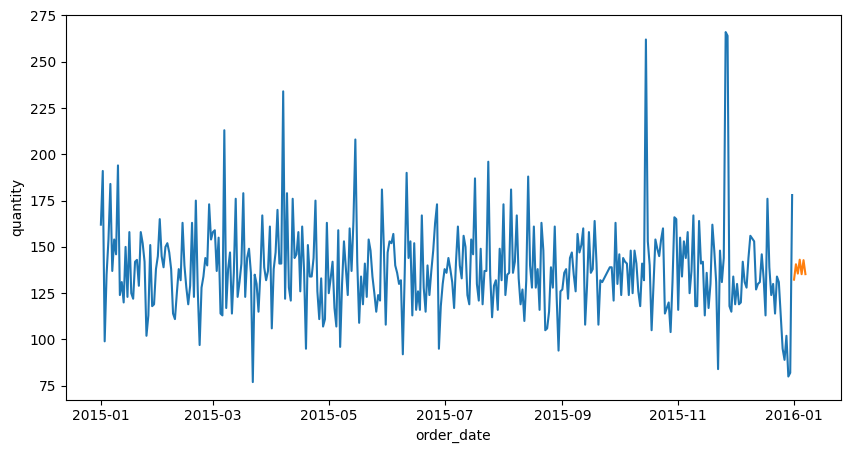

In [213]:
plt.figure(figsize=(10,5))
sns.lineplot(data=sales_data,x="order_date",y="quantity")
sns.lineplot(data=forecast_df,x="order_date",y="forecasted_sales")
plt.show()

In [214]:
forecast_df

,order_date,forecasted_sales
299,2016-01-01,132.309990
300,2016-01-02,140.621248
301,2016-01-03,135.585679
302,2016-01-04,143.085634
303,2016-01-05,135.254658
304,2016-01-06,142.838154
305,2016-01-07,135.287902


In [215]:
ingredients = pd.read_csv("F:\GUVI\Project\Dominos - Predictive Purchase Order System\Cleaned_DATA\ingredients_data.csv", index_col=0)

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\syeda\AppData\Local\Temp\ipykernel_22400\2694981386.py:1: SyntaxWarning: invalid escape sequence '\G'
  ingredients = pd.read_csv("F:\GUVI\Project\Dominos - Predictive Purchase Order System\Cleaned_DATA\ingredients_data.csv", index_col=0)


In [216]:
ingredients.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0


In [217]:
ingredient_requirements = []

In [218]:
for index, row in forecast_df.iterrows():
    date = row['order_date']
    predicted_sales = int(row['forecasted_sales'])

    for _, ingredient_row in ingredients.iterrows():
        ingredient_qty = ingredient_row['Items_Qty_In_Grams'] * predicted_sales

        #append the ingredient requirements to the list
        ingredient_requirements.append({
            "Date": date,
            "Ingredient": ingredient_row["pizza_ingredients"],
            "Total Quantity Needed (grams)": ingredient_qty
            
        })

# Convert the list to a DataFrame
ingredient_requirements_df = pd.DataFrame(ingredient_requirements)

# Reset index for better readability
# ingredient_requirements_df.reset_index(drop=True, inplace=True)

In [219]:
ingredient_requirements_df

,Date,Ingredient,Total Quantity Needed (grams),Items_Qty_In_Grams
0,2016-01-01,Barbecued Chicken,5280.0,40.0
1,2016-01-01,Red Peppers,1980.0,15.0
2,2016-01-01,Green Peppers,2640.0,20.0
3,2016-01-01,Tomatoes,3960.0,30.0
4,2016-01-01,Red Onions,7920.0,60.0
...,...,...,...,...
3621,2016-01-07,Green Peppers,2700.0,20.0
3622,2016-01-07,Red Onions,2700.0,20.0
3623,2016-01-07,Zucchini,1350.0,10.0
3624,2016-01-07,Spinach,2025.0,15.0
